<a href="https://colab.research.google.com/github/ariefibrahim/MLProjects/blob/master/Regression_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is about predicting boston housing price with Regression methods

In [0]:
# Load libraries
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import pandas as pd  
import seaborn as sns 

In [0]:
filename = datasets.load_boston()

In [21]:
filename.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [0]:
# Create feature matrix
X = pd.DataFrame(filename.data, columns=filename.feature_names)

# Create target vector
y = pd.DataFrame(filename.target, columns=['MEDV'])

In [27]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
y.head(5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


**Exploratory Data Analysis (EDA)**

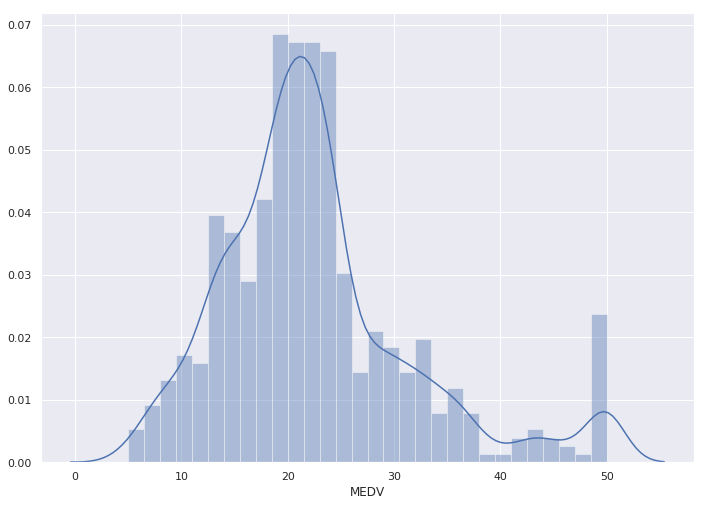

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y['MEDV'], bins=30)
plt.show()

the values of MEDV are distributed normally with few outliers

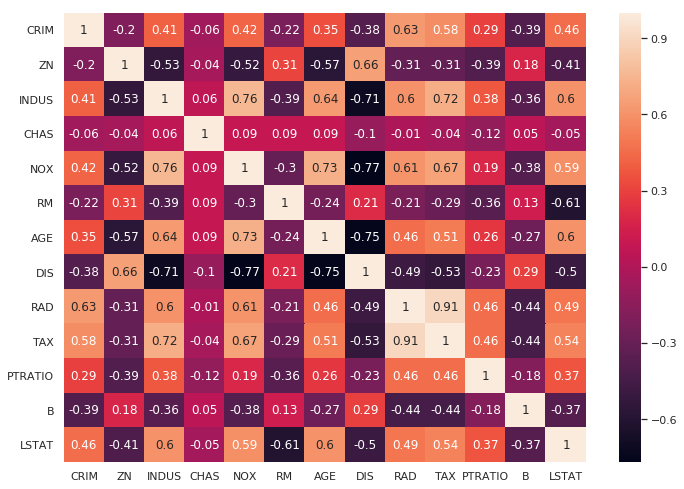

In [37]:
correlation_matrix = X.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3458588c88>,
      dtype=object)

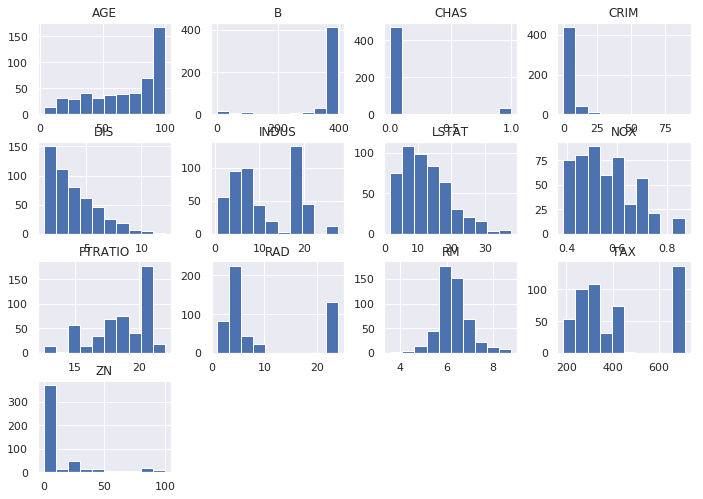

In [38]:
X.hist()

some attributes may have an exponential distribution, such as CRIM, ZN,
AGE and B. Others may have a bimodal distribution such as RAD and TAX.

In [0]:
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [78]:
X_train.shape

(404, 13)

In [80]:
Y_train.shape

(404, 1)

In [79]:
X_validation.shape

(102, 13)

In [82]:
Y_validation.shape

(102, 1)

In [0]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring_list = ['neg_mean_squared_error','neg_mean_absolute_error','r2']

> - Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).
> - Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).

In [0]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [0]:
# evaluate each model in turn
results = []
names = []
error_msg = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  for scoring in scoring_list:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    error_msg.append("%s %s: %f (Standard Deviation: %f)" % (name, scoring, cv_results.mean(), cv_results.std()))

In [54]:
error_msg

['ScaledLR neg_mean_squared_error: -25.223971 (Standard Deviation: 8.769171)',
 'ScaledLR neg_mean_absolute_error: -3.512656 (Standard Deviation: 0.475849)',
 'ScaledLR r2: 0.696501 (Standard Deviation: 0.111111)',
 'ScaledLASSO neg_mean_squared_error: -30.450409 (Standard Deviation: 10.412011)',
 'ScaledLASSO neg_mean_absolute_error: -3.803926 (Standard Deviation: 0.515088)',
 'ScaledLASSO r2: 0.638164 (Standard Deviation: 0.107291)',
 'ScaledEN neg_mean_squared_error: -32.387159 (Standard Deviation: 11.796724)',
 'ScaledEN neg_mean_absolute_error: -3.853844 (Standard Deviation: 0.491717)',
 'ScaledEN r2: 0.613709 (Standard Deviation: 0.128134)',
 'ScaledKNN neg_mean_squared_error: -24.495927 (Standard Deviation: 11.884086)',
 'ScaledKNN neg_mean_absolute_error: -2.964127 (Standard Deviation: 0.442824)',
 'ScaledKNN r2: 0.694260 (Standard Deviation: 0.188943)',
 'ScaledCART neg_mean_squared_error: -20.038463 (Standard Deviation: 9.966356)',
 'ScaledCART neg_mean_absolute_error: -2.977

Improve the result with tuning KNN

In [0]:
# KNN Algorithm tuning
error_msg_KNN = []
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
for scoring in scoring_list:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid_result = grid.fit(rescaledX, Y_train)
  error_msg_KNN.append("Best %s: %f using %s" % (scoring, grid_result.best_score_, grid_result.best_params_))
  #means = grid_result.cv_results_['mean_test_score']
  #stds = grid_result.cv_results_['std_test_score']
  #params = grid_result.cv_results_['params']
  #for mean, stdev, param in zip(means, stds, params):
  #  print("%f (%f) with: %r" % (mean, stdev, param))

In [59]:
error_msg_KNN

["Best neg_mean_squared_error: -21.429139 using {'n_neighbors': 3}",
 "Best neg_mean_absolute_error: -2.856518 using {'n_neighbors': 3}",
 "Best r2: 0.734331 using {'n_neighbors': 3}"]

Ensemble Methods
> - Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
> - Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [0]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
error_msg_ensemble=[]
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  for scoring in scoring_list:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    error_msg_ensemble.append("%s %s: %f (Standard Deviation: %f)" % (name, scoring, cv_results.mean(), cv_results.std()))

In [61]:
error_msg_ensemble

['ScaledAB neg_mean_squared_error: -13.104145 (Standard Deviation: 4.601544)',
 'ScaledAB neg_mean_absolute_error: -2.682280 (Standard Deviation: 0.286501)',
 'ScaledAB r2: 0.829002 (Standard Deviation: 0.078258)',
 'ScaledGBM neg_mean_squared_error: -9.196202 (Standard Deviation: 3.592877)',
 'ScaledGBM neg_mean_absolute_error: -2.163154 (Standard Deviation: 0.228084)',
 'ScaledGBM r2: 0.885275 (Standard Deviation: 0.047063)',
 'ScaledRF neg_mean_squared_error: -12.395744 (Standard Deviation: 6.324681)',
 'ScaledRF neg_mean_absolute_error: -2.413734 (Standard Deviation: 0.273037)',
 'ScaledRF r2: 0.846537 (Standard Deviation: 0.061357)',
 'ScaledET neg_mean_squared_error: -10.428074 (Standard Deviation: 3.220535)',
 'ScaledET neg_mean_absolute_error: -2.266897 (Standard Deviation: 0.239586)',
 'ScaledET r2: 0.856137 (Standard Deviation: 0.101302)']

Tune GradientBoostingRegressor with Hyperparameter

In [0]:
# Tune scaled GBM
error_msg_GBM = []
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
for scoring in scoring_list:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid_result = grid.fit(rescaledX, Y_train)
  error_msg_GBM.append("Best %s: %f using %s" % (scoring, grid_result.best_score_, grid_result.best_params_))

In [63]:
error_msg_GBM

["Best neg_mean_squared_error: -8.862803 using {'n_estimators': 150}",
 "Best neg_mean_absolute_error: -2.118366 using {'n_estimators': 200}",
 "Best r2: 0.891832 using {'n_estimators': 200}"]

Finalize the model with n_estimators = 200

In [64]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [0]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

In [0]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = 100*np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    #me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    #mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

In [77]:
forecast_accuracy(predictions, Y_validation.MEDV.values)

{'mae': 1.8755704317637452,
 'mape': 10.24347390041612,
 'rmse': 3.038149717978377}